In [1]:
import pandas as pd
df = pd.read_csv ("dataset_preprocessing.csv")
df[['RH', 'RO', 'RJ', 'RD']].sum()

RH    6583
RO    1428
RJ     606
RD     883
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

x = df.drop(columns=['RH', 'RO', 'RJ', 'RD'])
y = df[['RH', 'RO', 'RJ', 'RD']]

min_samples = 606 
mask_no_risk = (y.sum(axis=1) == 0)
df_no_risk = df[mask_no_risk].copy()

df_no_risk_sampled = df_no_risk.sample(n=min_samples, random_state=42, replace=(len(df_no_risk < min_samples)))

df_risk = df[~mask_no_risk].copy()

under_dfs = []
for col in y.columns:
    x_col = df_risk[x.columns].copy()
    y_col = df_risk[col].copy()
    class_counts = y_col.valNue_counts()

    if class_counts.get(1, 0) >= min_samples:
        sampling_strategy = {1: min_samples, 0: 0}
    else:
        sampling_strategy = {1: class_counts.get(1, 0), 0: 0} 

    undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    x_under, y_under = undersampler.fit_resample(x_col, y_col)

    df_under = x_under.copy()
    df_under[col] = y_under

    under_dfs.append(df_under)

final_df = pd.concat(under_dfs, ignore_index=True)
df = pd.concat([final_df, df_no_risk_sampled], ignore_index=True)
df.fillna(0, inplace=True)
df[y.columns] = df[y.columns].astype('int64')



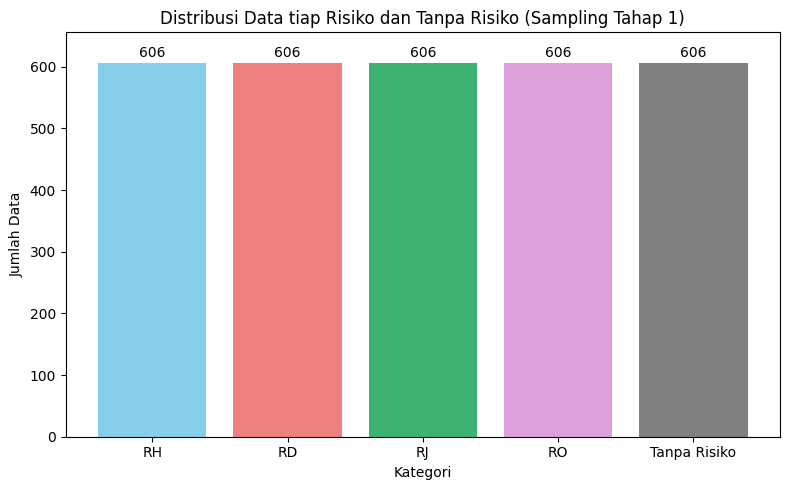

In [3]:
import matplotlib.pyplot as plt

jumlah_data = {
    'RH': df['RH'].sum(),
    'RD': df['RD'].sum(),
    'RJ': df['RJ'].sum(),
    'RO': df['RO'].sum(),
    'Tanpa Risiko': ((df[['RH', 'RD', 'RJ', 'RO']].sum(axis=1) == 0)).sum()
}

plt.figure(figsize=(8, 5))
plt.bar(jumlah_data.keys(), jumlah_data.values(), color=['skyblue', 'lightcoral', 'mediumseagreen', 'plum', 'gray'])
plt.title('Distribusi Data tiap Risiko dan Tanpa Risiko (Sampling Tahap 1)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(jumlah_data.values()) + 50)

for i, (key, value) in enumerate(jumlah_data.items()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [4]:
print(f"Jumlah Dataset hasil sampling tahap 1: {df.shape[0]} baris dan {df.shape[1]} kolom")

Jumlah Dataset hasil sampling tahap 1: 3030 baris dan 64 kolom


In [1]:
df.to_csv("sampling_tahap1.csv", index=False)

NameError: name 'df' is not defined

In [6]:
risiko_list = ['RH', 'RO', 'RJ', 'RD']

for risiko in risiko_list:
    
    data_pos = df[df[risiko] == 1]
    risiko_lain = [r for r in risiko_list if r != risiko]

    if risiko == 'RH':
        data_neg_candidates = df[(df[risiko] == 0) & (df[risiko_lain] != 1).all(axis=1)]
    else:
        data_neg_candidates = df[(df[risiko] == 0) & (df[risiko_list] == 0).sum(axis=1) <= 1]

    data_neg = data_neg_candidates.sample(n=len(data_pos), random_state=42)
    data_risiko = pd.concat([data_pos, data_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

    filename = f'sampling_{risiko}.csv'
    data_risiko.to_csv(filename, index=False)

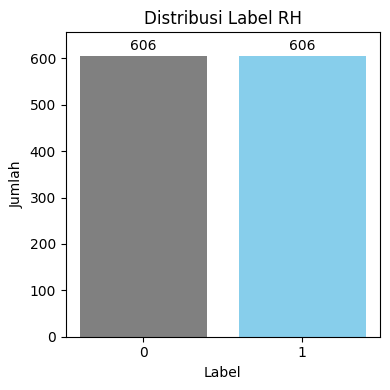

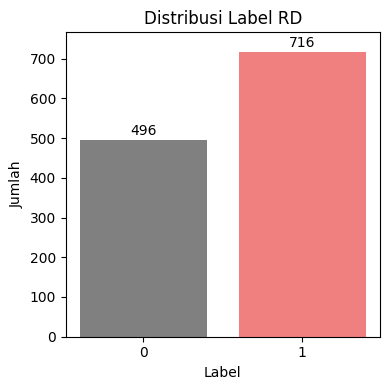

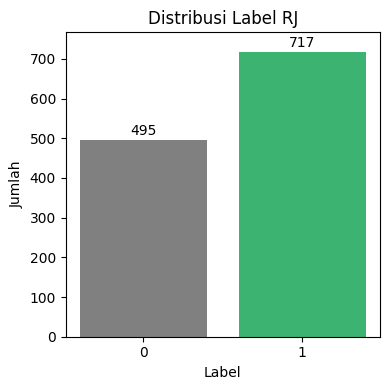

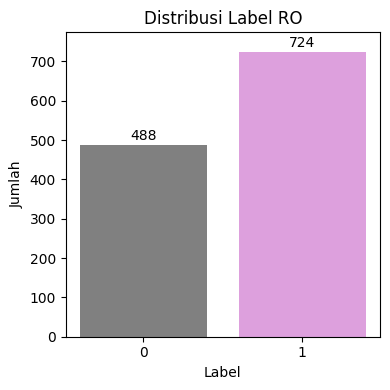

In [7]:
file_risiko_map = {
    'sampling_RH.csv': 'RH',
    'sampling_RD.csv': 'RD',
    'sampling_RJ.csv': 'RJ',
    'sampling_RO.csv': 'RO',
}

warna_label_1 = {
    'RH': 'skyblue',
    'RD': 'lightcoral',
    'RJ': 'mediumseagreen',
    'RO': 'plum'
}
warna_label_0 = 'gray'

for file, risiko in file_risiko_map.items():
    df = pd.read_csv(file)

    counts = df[risiko].value_counts().sort_index() 

    plt.figure(figsize=(4, 4))
    for i, label in enumerate(counts.index):
        warna = warna_label_1[risiko] if label == 1 else warna_label_0
        plt.bar(str(label), counts[label], color=warna)
        plt.text(i, counts[label] + 5, str(counts[label]), ha='center', va='bottom')

    plt.title(f'Distribusi Label {risiko}')
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.ylim(0, max(counts.values) + 50)
    plt.tight_layout()
    plt.show()


In [8]:
file_list = ['sampling_RH.csv', 'sampling_RD.csv', 'sampling_RJ.csv', 'sampling_RO.csv']
df = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)
print(f"Jumlah Dataset hasil sampling tahap 2: {df.shape[0]} baris dan {df.shape[1]} kolom")

Jumlah Dataset hasil sampling tahap 2: 4848 baris dan 64 kolom
